<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/FarmSpiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Das Farm-Spiel
In diesem Notebook ist eine (erste, einfache) Implementierung unseres Farm-Spiels umgesetzt. Es handelt sich dabei um ein rundenbasiertes Strategie-Spiel, bei dem man entscheiden muss, ob und wann man welche Pflanzen anbaut und verkauft.

# Fragen?
Solltet ihr Fragen zum Code oder Probleme mit Colab haben, schickt uns gerne eine Mail:

*   hohansen@inb.uni-luebeck.de
*   maren.wieder@student.uni-luebeck.de
*   friederike.meissner@student.uni-luebeck.de
*   dustin.haschke@student.uni-luebeck.de

## Spielinitialisierung
In diesem Abschnitt muss nichts verändert werden. Es reicht, wenn der Codeblock ausgeführt wird.

In [46]:
import random
import matplotlib.pyplot as plt

def faktor():
    z = random.random()-0.5
    if z<0:
        return 1/(1+z)
    else:
        return 1-z


class Spiel():
    def __init__(self, n_tage=10, startwert=10):
        self.markt = Markt(n_tage=n_tage, n_pflanzen=3)
        self.farm = Farm(startwert=startwert)
        self.__n_tage = 10
        self.__tag = 0
        self.ende = False
        self.__budgetverlauf = [startwert]

        print("Willkommen auf deiner Farm! :-)")
        print(f"Wir spielen {self.__n_tage} Tage, in denen du deine Farm bewirtschaften kannst.")
        print(f"Dein Startkapital beträgt {startwert} Spielgeld.")
        print("Viel Spaß! :-)")
    
    def play(self, felder):

        if self.__tag>self.__n_tage or self.ende:
            self.endefunc()
            self.ende = True
            return
        
        felder_alt = self.farm.get_felder()
        kaufen = ""
        verkaufen = ""
        for i in range(len(felder)):
            for j in range(len(felder[i])):
                felder[i][j] = (felder[i][j]).upper()
                if felder[i][j]!=felder_alt[i][j]:
                    if felder[i][j] in ["V", "L"]:
                        verkaufen += felder_alt[i][j]
                        felder[i][j] = "L"
                    else:
                        kaufen += felder[i][j]
        self.farm.set_felder(felder)
        self.farm.kaufen(kaufen, self.markt.saatpreise(self.__tag))
        self.farm.verkaufen(verkaufen, self.markt.pflanzenpreise(self.__tag))
        self.__tag += 1
        print(f"Tag: {self.__tag}")
        print(f"Farmbudget: {self.farm.get_budget()}")
        if self.farm.get_felder()[0][0] != "F":
            self.endefunc()
            self.ende = True
            return
        self.farm.draw()
        print(20*"-")
        print("Nächste Preise:")
        p = Erdbeere()
        print("Erdbeeren:")
        print(f"\tSaatkaufpreis: {self.markt.saatpreise(self.__tag)[int(p)]*p.einkaufspreis}")
        print(f"\tVerkaufspreis: {self.markt.pflanzenpreise(self.__tag)[int(p)]*p.verkaufspreis}")
        print("Mais:")
        p = Mais()
        print(f"\tSaatkaufpreis: {self.markt.saatpreise(self.__tag)[int(p)]*p.einkaufspreis}")
        print(f"\tVerkaufspreis: {self.markt.pflanzenpreise(self.__tag)[int(p)]*p.verkaufspreis}")
        print("Kartoffeln:")
        p = Kartoffel()
        print(f"\tSaatkaufpreis: {self.markt.saatpreise(self.__tag)[int(p)]*p.einkaufspreis}")
        print(f"\tVerkaufspreis: {self.markt.pflanzenpreise(self.__tag)[int(p)]*p.verkaufspreis}")
        self.__budgetverlauf.append(self.farm.get_budget())
    
    def endefunc(self):
        self.farm.draw()
        print(f"Das Spiel ist vorbei! Du hast das Spiel an Tag {self.__tag} mit {self.farm.get_budget()} Spielgeld beendet. \nHerzlichen Glückwunsch :-)")
        plt.figure()
        plt.plot(self.__budgetverlauf)
        plt.title("Budgetverlauf")
        plt.grid()
        plt.show()


class Farm():
    def __init__(self, startwert):
        self.__budget = startwert
        self.__felder = 8
        self.__felder = [["F", "L", "L"], 3*["L"], 3*["L"]]

    def draw(self):
        print(5*"#")
        for feldline in self.__felder:
            print("#"+"".join(feldline)+"#")
        print(5*"#")
    
    def get_budget(self):
        return self.__budget

    def get_budget_verlauf(self):
        return self.__budget

    def set_felder(self, felder):
        self.__felder = felder

    def get_felder(self):
        return self.__felder

    def kaufen(self, k, preise):
        lookup = {
                    "E": Erdbeere(), 
                    "K": Kartoffel(),
                    "M": Mais()
                 }
        for val in k:
            if val in lookup:
                obj = lookup[val]
                self.__budget -= preise[int(obj)]*obj.einkaufspreis

    
    def verkaufen(self, v, preise):
        lookup = {
                    "E": Erdbeere(), 
                    "K": Kartoffel(),
                    "M": Mais()
                 }
        for val in v:
            if val in lookup:
                obj = lookup[val]
                self.__budget += preise[int(obj)]*obj.verkaufspreis
            if val=="F":
                self.__budget += 1000


class Markt():
    def __init__(self, n_tage=10, n_pflanzen=3):
        self.__verlauf_pflanze = self.__set_verlauf(n_tage, n_pflanzen)
        self.__verlauf_saat = self.__set_verlauf(n_tage, n_pflanzen)

    def saatpreise(self, tag=0):
        if tag>=len(self.__verlauf_saat):
            return len(self.__verlauf_saat[0])*[0]
        return self.__verlauf_saat[tag]

    def pflanzenpreise(self, tag=0):
        if tag>=len(self.__verlauf_pflanze):
            return len(self.__verlauf_pflanze[0])*[0]
        return self.__verlauf_pflanze[tag]

    def __set_verlauf(self, n_tage, n_pflanzen):
        return [[faktor() for i in range(n_pflanzen)] for _ in range(n_tage)]


class Feldfrucht():
    def __init__(self, name, einkaufspreis, verarbeitungskosten, verkaufspreis):
        self.name = name
        self.einkaufspreis = einkaufspreis
        self.verarbeitungskosten = verarbeitungskosten
        self.verkaufspreis = verkaufspreis
        self.idx = 0

    def __int__(self):
        return self.idx


class Erdbeere(Feldfrucht):
    def __init__(self, einkaufspreis=1., verarbeitungskosten=0, verkaufspreis=2.5):
        super().__init__("Erdbeere", einkaufspreis, verarbeitungskosten, verkaufspreis)
        self.idx = 0


class Mais(Feldfrucht):
    def __init__(self, einkaufspreis=.5, verarbeitungskosten=0, verkaufspreis=1.1):
        super().__init__("Mais", einkaufspreis, verarbeitungskosten, verkaufspreis)
        self.idx = 1


class Kartoffel(Feldfrucht):
    def __init__(self, einkaufspreis=.4, verarbeitungskosten=0, verkaufspreis=1.2):
        super().__init__("Kartoffel", einkaufspreis, verarbeitungskosten, verkaufspreis)
        self.idx = 2

def set_all_to(s):
    return [["F", s, s], 3*[s], 3*[s]]

def sell_EVERYTHING():
    return 3*[3*["v"]]

spiel = Spiel(startwert=5, n_tage=10)

Willkommen auf deiner Farm! :-)
Wir spielen 10 Tage, in denen du deine Farm bewirtschaften kannst.
Dein Startkapital beträgt 5 Spielgeld.
Viel Spaß! :-)


## Das eigentliche Spiel
Da das Spiel rundenbasiert sein soll, brauchen wir im "Hintergrund" einen Rahmen des Spiels (das ist die Klasse `Spiel` in dem Codeblock darüber), der nicht mehr verändert wird. Mit anderen Worten: Ein neues Spiel beginnt, wenn man den ersten Codeblock ausführt, eine neue Runde beginnt, wenn der zweite Codeblock ausgeführt wird.

### Kurze Erklärung
Ziel des Spiels ist es, in gegebener Zeit möglichst viel Geld zu verdienen! Kauft man beispielsweise Erdbeer-Saat für 0.5 und verkauft die fertigen Erdbeeren für 2, so hat man 1.5 Gewinn gemacht! 

### Steuerung
Das einzige, was in dem untenstehenden Codeblock verändert werden muss, sind die Einträge der Liste `felder`. `felder` beschreibt den Aufbau der Farm. Oben links steht immer das Farmgebäude, ohne das die Farm nicht existieren kann. Folgende Befehle können durchgeführt werden:
- `V`: Verkaufe, was auf dem Feld gewachsen ist! Ist auf dem Feld nichts, so wird auch kein Gewinn erzielt.
- `E`, `K` oder `M`: Baue Erdbeeren, Kartoffeln bzw. Mais an. Hierbei wird automatisch die Saat gekauft.
- `L`: Leeres Feld. Ist vorher auf dem jeweiligen Feld eine Feldfrucht, so wird sie automatisch verkauft.

**Achtung:** Die Liste `felder` muss *immer* genau 3 Listen mit jeweils 3 Einträgen enthalten!

### Ausgaben unter dem Codeblock
Unter dem Codeblock werden Informationen ausgegeben, die für das Spielen wichtig sind. So wird die aktuelle Tagesnummer angezeigt, das aktuelle Budget ("wie viel Geld haben wir über?") und ein "Bild" der Farm ausgegeben. Die Hashtags # sollen dabei den Zaun um unsere Farm symbolisieren.

Unter dem Trennstrich werden die nächsten Preise für die jeweilige Saat und der Verkaufspreis der gewachsenen Pflanze angegeben. Hier muss nun entschieden werden, was der nächste Zug sein wird.

Das Spiel endet nach der jeweiligen angegebenen Tageszahl `n_tage` (Standardwert ist hierbei 10).

Tag: 11
Farmbudget: 1034.6474063705189
#####
#LLL#
#LLL#
#LLL#
#####
Das Spiel ist vorbei! Du hast das Spiel an Tag 11 mit 1034.6474063705189 Spielgeld beendet. 
Herzlichen Glückwunsch :-)


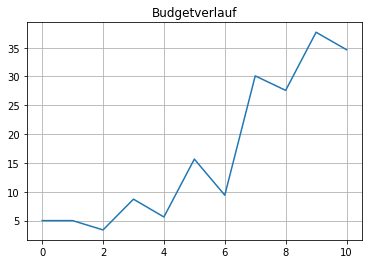

In [57]:
# Hier könnt ihr entscheiden, was ihr machen wollt
#   E: Baue Erdbeeren an
#   K: Baue Kartoffeln an
#   M: Baue Mais an
#   V: Verkaufe, was auf dem Feld ist
#   L: Leeres Feld
felder = [
          ["F", "v", "v"],
          ["v", "v", "v"],
          ["v", "v", "v"]
        ]
felder = set_all_to("v")
felder = sell_EVERYTHING()
# Starte Spiel
spiel.play(felder)